In [ ]:

# #importing the required libraries
# import cv2
# import numpy as np

# #capture the video from default camera 
# webcam_video_stream = cv2.VideoCapture('images/testing/modi.mp4')

# # downloading the caffe model definition and weights
# # https://github.com/opencv/opencv/blob/master/samples/dnn/face_detector/deploy.prototxt
# # https://github.com/opencv/opencv_3rdparty/blob/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel

# #load the pretrained ssd classifier model
# face_detection_classifier = cv2.dnn.readNetFromCaffe('models/deploy.prototxt.txt','models/res10_300x300_ssd_iter_140000.caffemodel')


# #initialize the array variable to hold all face locations in the frame
# all_face_locations = []

# #loop through every frame in the video
# while True:
#     #get the current frame from the video stream as an image
#     ret,current_frame = webcam_video_stream.read()
#     img_height = current_frame.shape[0]
#     img_width = current_frame.shape[1]
    
#     # resize the image to 300x300
#     resized_image = cv2.resize(current_frame,(300,300))
    
#     # create blob of the image
#     image_to_detect_blob = cv2.dnn.blobFromImage(resized_image,1.0,(300,300),(104, 177, 123))
#     # https://github.com/opencv/opencv/tree/master/samples/dnn mean subtraction values for RGB
    
#     # pass the blob as model input
#     face_detection_classifier.setInput(image_to_detect_blob)
    
#     #detect all face locations using the haar classifier
#     all_face_locations = face_detection_classifier.forward()
#     # 4-D array returned, 
#     # eg: all_face_locations[0, 0, index, 1] , 1 => will have the prediction class index
#     # 2 => will have confidence, 
#     # 3 to 7 => will have the bounding box co-ordinates
    
    
#     #print the number of faces detected
#     print('There are {} no of faces in this image'.format(len(all_face_locations)))
    
#     #number of faces detected
#     no_of_detections = all_face_locations.shape[2]
    
#     #looping through the face locations
#     for index in range(no_of_detections):
#         detection_confidence = all_face_locations[0, 0, index, 2]
        
#         if detection_confidence > 0.5:       
#             current_face_location = all_face_locations[0, 0, index, 3:7] * np.array([img_height, img_width, img_width, img_height]) 
#             #splitting the tuple to get the four position values of current face
#             left_x,left_y,right_x,right_y = current_face_location.astype("int")
#             #printing the location of current face
#             print('Found face {} at left_x:{},left_y:{},right_x:{},right_y:{}'.format(index+1,left_x,left_y,right_x,right_y))
#             #slicing the current face from main image
#             current_face_image = current_frame[left_y:right_y,left_x:right_x]
#             #showing the current face with dynamic title
#             cv2.imshow("Face no "+str(index+1),current_face_image)
#             #draw bounding box around the faces
#             cv2.rectangle(current_frame,(left_x,left_y),(right_x,right_y),(0,255,0),2)

#     #showing the current face with rectangle drawn
#     cv2.imshow("Saved Video",current_frame)
    
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# #release the stream and cam
# #close all opencv windows open
# webcam_video_stream.release()
# cv2.destroyAllWindows()        












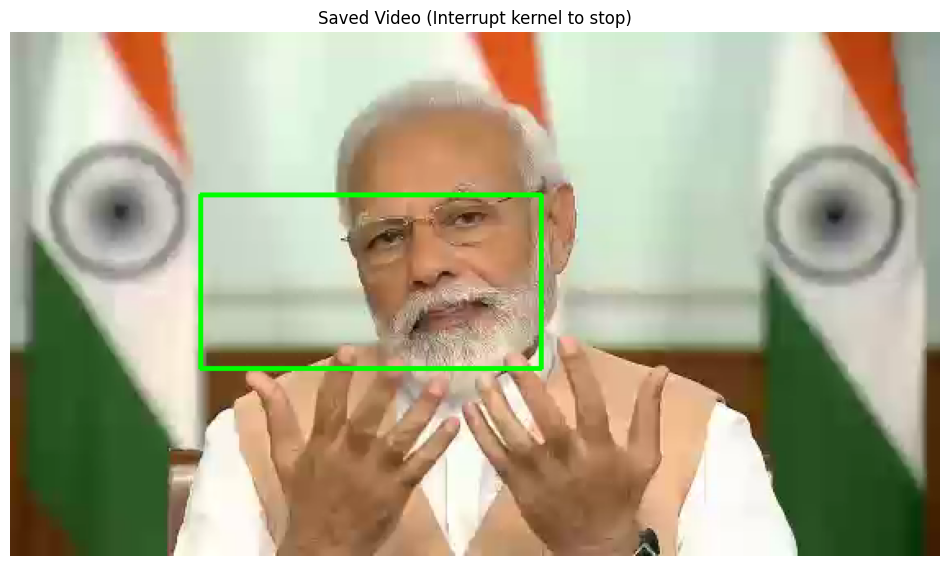

Video processing completed!


In [1]:
#importing the required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

%matplotlib inline

#capture the video from default camera 
webcam_video_stream = cv2.VideoCapture('images/testing/modi.mp4')
# downloading the caffe model definition and weights
# https://github.com/opencv/opencv/blob/master/samples/dnn/face_detector/deploy.prototxt
# https://github.com/opencv/opencv_3rdparty/blob/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
#load the pretrained ssd classifier model
face_detection_classifier = cv2.dnn.readNetFromCaffe('models/deploy.prototxt.txt','models/res10_300x300_ssd_iter_140000.caffemodel')
#initialize the array variable to hold all face locations in the frame
all_face_locations = []

#create figure for displaying video
fig, ax = plt.subplots(figsize=(12, 8))

#loop through every frame in the video
while True:
    #get the current frame from the video stream as an image
    ret,current_frame = webcam_video_stream.read()
    
    #break if no frame returned (end of video)
    if not ret:
        break
    
    img_height = current_frame.shape[0]
    img_width = current_frame.shape[1]
    
    # resize the image to 300x300
    resized_image = cv2.resize(current_frame,(300,300))
    
    # create blob of the image
    image_to_detect_blob = cv2.dnn.blobFromImage(resized_image,1.0,(300,300),(104, 177, 123))
    # https://github.com/opencv/opencv/tree/master/samples/dnn mean subtraction values for RGB
    
    # pass the blob as model input
    face_detection_classifier.setInput(image_to_detect_blob)
    
    #detect all face locations using the haar classifier
    all_face_locations = face_detection_classifier.forward()
    # 4-D array returned, 
    # eg: all_face_locations[0, 0, index, 1] , 1 => will have the prediction class index
    # 2 => will have confidence, 
    # 3 to 7 => will have the bounding box co-ordinates
    
    
    #print the number of faces detected
    print('There are {} no of faces in this image'.format(len(all_face_locations)))
    
    #number of faces detected
    no_of_detections = all_face_locations.shape[2]
    
    #looping through the face locations
    for index in range(no_of_detections):
        detection_confidence = all_face_locations[0, 0, index, 2]
        
        if detection_confidence > 0.5:       
            current_face_location = all_face_locations[0, 0, index, 3:7] * np.array([img_height, img_width, img_width, img_height]) 
            #splitting the tuple to get the four position values of current face
            left_x,left_y,right_x,right_y = current_face_location.astype("int")
            #printing the location of current face
            print('Found face {} at left_x:{},left_y:{},right_x:{},right_y:{}'.format(index+1,left_x,left_y,right_x,right_y))
            #draw bounding box around the faces
            cv2.rectangle(current_frame,(left_x,left_y),(right_x,right_y),(0,255,0),2)
    
    #showing the current frame in Jupyter
    current_frame_rgb = cv2.cvtColor(current_frame, cv2.COLOR_BGR2RGB)
    ax.clear()
    ax.imshow(current_frame_rgb)
    ax.set_title("Saved Video (Interrupt kernel to stop)")
    ax.axis('off')
    clear_output(wait=True)
    display(fig)

#release the stream and cam
webcam_video_stream.release()
plt.close()
print("Video processing completed!")